# testing
## testing Python

In [1]:
print('Hello, world!')

Hello, world!


In [2]:
!ls

test-peerd.ipynb


In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %code_wrap  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %

In [4]:
%matplotlib inline

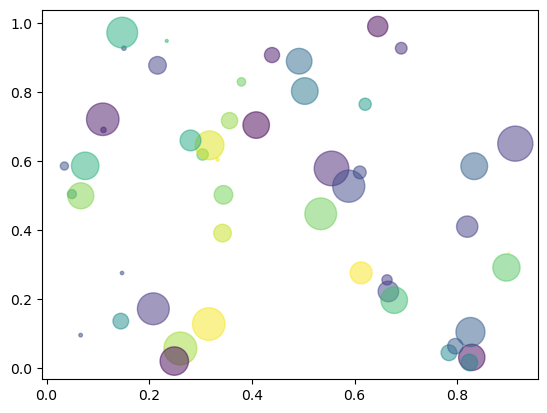

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N)) **2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [6]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10,5))
df

,0,1,2,3,4
0,-1.219610,0.186503,-0.416396,-1.234915,-0.560597
1,1.136930,0.232310,-0.615216,1.484063,-1.746208
2,1.134074,-1.253853,0.539516,0.259306,-0.008414
3,-2.463714,-0.511204,0.860328,-0.381181,-0.399159
4,0.856273,-0.513935,-0.135827,-0.456492,1.384530
5,0.955469,-1.098600,-1.581038,-1.264316,1.339778
6,1.370161,-1.174292,0.397610,0.513695,0.305970
7,2.002166,0.017027,1.192496,0.725281,-0.809050
8,0.200502,0.464531,-0.475311,-0.901865,-1.452736
9,0.157410,-0.521722,-0.462073,-1.324960,-0.708522


## testing MLflow

In [7]:
import mlflow

mlflow.set_tracking_uri("http://dcc2a8f0061b:5000")
mlflow.set_experiment("check-localhost-connection")

with mlflow.start_run():
    mlflow.log_metric("foo", 1)
    mlflow.log_metric("bar", 2)

print("done")

MlflowException: API request to http://dcc2a8f0061b:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='dcc2a8f0061b', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=check-localhost-connection (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7fb6546971d0>: Failed to resolve 'dcc2a8f0061b' ([Errno -2] Name or service not known)"))

In [ ]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://dcc2a8f0061b:5000")

# Create a new MLflow Experiment
mlflow.set_experiment("MLflow Quickstart")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("accuracy", accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for iris data")

    # Infer the model signature
    signature = infer_signature(X_train, lr.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-quickstart",
    )

In [ ]:
import mlflow
from mlflow.models import infer_signature

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the Iris dataset
X, y = datasets.load_iris(return_X_y=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the model hyperparameters
params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
}

# Train the model
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)



    





In [ ]:
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://localhost:5000")

# Create a new MLflow Experiment
mlflow.set_experiment("MLflow Quickstart")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("accuracy", accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for iris data")

    # Infer the model signature
    signature = infer_signature(X_train, lr.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-quickstart",
    )

In [ ]:
# Load the model back for predictions as a generic Python Function model
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

predictions = loaded_model.predict(X_test)

iris_feature_names = datasets.load_iris().feature_names

result = pd.DataFrame(X_test, columns=iris_feature_names)
result["actual_class"] = y_test
result["predicted_class"] = predictions

result[:4]